In [1]:
import numpy as np
import pandas as pd
import csv
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
filename_test = 'test1.csv'
filename_train = 'train1.csv'
filename_valid = 'valid1.csv'

In [3]:
train_news = pd.read_csv(filename_train)
test_news = pd.read_csv(filename_test)
valid_news = pd.read_csv(filename_valid)

In [4]:
def data_observed():
    print(" The size of training data : ")
    print(train_news.shape)
    print(train_news.head(10))
    
    print(test_news.shape)
    print(test_news.head(10))
    
    print(valid_news.shape)
    print(valid_news.head(10))

In [5]:
def plot_creation(datafile):
    return sb.countplot(x = 'Label', data=datafile, palette='hls')

<AxesSubplot:xlabel='Label', ylabel='count'>

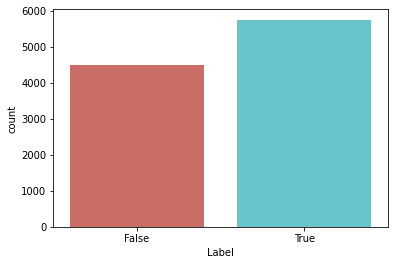

In [6]:
plot_creation(train_news)

<AxesSubplot:xlabel='Label', ylabel='count'>

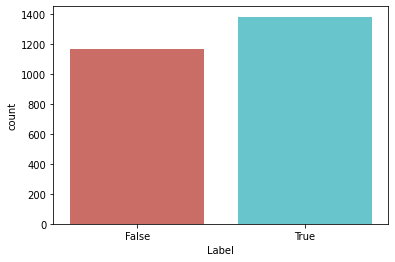

In [7]:
plot_creation(test_news)

<AxesSubplot:xlabel='Label', ylabel='count'>

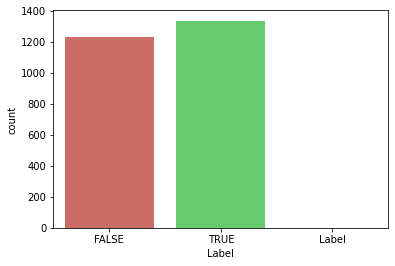

In [8]:
plot_creation(valid_news)

In [9]:
def QualityCheck():
    print("The quality of the dataset to be checked")
    train_news.isnull().sum()
    train_news.info()
    
    print('Check done')
    
    test_news.isnull().sum()
    test_news.info()
    
    valid_news.isnull().sum()
    valid_news.info()

In [10]:
def StemTokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [11]:
def ProcessData(data,exclude_stopword=True, stem=True):
    tokens = [k.lower() for k in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [k for k in tokens_stemmed if k not in stopwords]
    return tokens_stemmed

In [12]:
def CreateUnigram(words):
    assert type(words) == list
    return words

In [13]:
def CreateBigrams(words):
    assert type(words) == list
    skip = 0
    join_str = ' '
    l = len(words)
    if(l>1):
        list1 = []
        for i in range(l-1):
            for k in range(1,skip+2):
                if(i+k < l):
                    list1.append(join_str.join([words[i],words[i+k]]))
    else:
        list1 = CreateUnigram(words)
    return list1

In [14]:
porter  = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer()

In [16]:
train_count_subject = countv.fit_transform(train_news['subject'].values.astype('U'))

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [18]:
train_count = countv.fit_transform(train_news['Statement'].values)

In [19]:
print(countv)

CountVectorizer()


In [20]:
print(train_count)

  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


In [21]:
print(train_count_subject)

  (0, 4)	1
  (1, 61)	1
  (1, 82)	1
  (1, 95)	1
  (1, 5)	1
  (2, 74)	1
  (2, 123)	1
  (3, 81)	1
  (3, 28)	1
  (4, 57)	1
  (4, 96)	1
  (5, 58)	1
  (6, 26)	1
  (6, 19)	1
  (7, 63)	1
  (8, 96)	1
  (9, 61)	1
  (9, 109)	1
  (9, 103)	1
  (9, 2)	1
  (9, 170)	1
  (9, 132)	1
  (10, 60)	1
  (11, 57)	1
  (11, 96)	1
  :	:
  (10231, 152)	1
  (10231, 22)	1
  (10232, 57)	1
  (10232, 96)	1
  (10233, 58)	1
  (10233, 152)	1
  (10233, 22)	2
  (10233, 158)	1
  (10233, 34)	1
  (10233, 51)	1
  (10233, 32)	1
  (10234, 60)	1
  (10234, 41)	1
  (10235, 60)	1
  (10235, 14)	1
  (10236, 60)	1
  (10237, 143)	1
  (10237, 147)	1
  (10237, 138)	1
  (10238, 74)	1
  (10238, 123)	1
  (10238, 72)	1
  (10239, 81)	1
  (10239, 28)	1
  (10239, 169)	1


In [22]:
def GetCountVectorizerStats():
    train_count.shape
    print(countv.vocabulary_)
    print(countv.get_feature_names()[:25])

In [23]:
tfidfv = TfidfTransformer()

In [24]:
train_tfidf = tfidfv.fit_transform(train_count)

In [25]:
train_tfidf_subject = tfidfv.fit_transform(train_count_subject)

In [26]:
def GetTfidfStats():
    train_tfidf.shape
    print(train_tfidf.A[:10])

In [27]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [28]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
cutoff = int(.75 * len(tagged_sentences))

In [29]:
training_sentences = train_news['Statement']

In [30]:
training_sentences_subject = train_news['subject']

In [31]:
print(training_sentences)

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object


In [32]:
print(training_sentences_subject)

0                                  abortion
1        energy,history,job-accomplishments
2                            foreign-policy
3                               health-care
4                              economy,jobs
                        ...                
10235                     animals,elections
10236                             elections
10237            retirement,social-security
10238                florida,foreign-policy
10239                  health-care,veterans
Name: subject, Length: 10240, dtype: object


In [33]:
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [34]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [35]:
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

In [36]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [37]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import OneHotEncoder

In [38]:
nb_pipeline = Pipeline([
        ('NBCV',countv),
        ('nb_clf',MultinomialNB())])
train_news['subject'] = train_news['subject'].values.astype('U')

In [39]:
nb_pipeline.fit(train_news['subject'],train_news['Label'])

Pipeline(steps=[('NBCV', CountVectorizer()), ('nb_clf', MultinomialNB())])

In [40]:
predicted_nb = nb_pipeline.predict(test_news['subject'].values.astype('U'))

In [41]:
np.mean(predicted_nb == test_news['Label'])

0.5331242649941199

In [42]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['subject'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text = train_news.iloc[test_ind]['subject']
        test_y = train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [43]:
build_confusion_matrix(nb_pipeline)

Total statements classified: 10240
Score: 0.6563424214194148
score length 5
Confusion matrix:
[[1578 2910]
 [1520 4232]]


(None, None, None, None, None)

In [44]:
logR_pipeline = Pipeline([
        ('LogRCV',countv),
        ('LogR_clf',LogisticRegression())
        ])

In [45]:
train_news['subject'] = train_news['subject'].values.astype('U')
logR_pipeline.fit(train_news['subject'],train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_LogR == test_news['Label'])

0.537436299490396

In [46]:
build_confusion_matrix(logR_pipeline)

Total statements classified: 10240
Score: 0.6752173202609347
score length 5
Confusion matrix:
[[1226 3262]
 [1157 4595]]


(None, None, None, None, None)

In [47]:
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

In [48]:
train_news['subject'] = train_news['subject'].values.astype('U')
nb_pipeline_ngram.fit(train_news['subject'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_nb_ngram == test_news['Label'])

0.5343002744021952

In [49]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

In [50]:
train_news['subject'] = train_news['subject'].values.astype('U')
logR_pipeline_ngram.fit(train_news['subject'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_LogR_ngram == test_news['Label'])

0.529204233633869

In [51]:
build_confusion_matrix(nb_pipeline_ngram)

Total statements classified: 10240
Score: 0.6820288737601685
score length 5
Confusion matrix:
[[1162 3326]
 [1054 4698]]


(None, None, None, None, None)

In [52]:
build_confusion_matrix(logR_pipeline_ngram)

Total statements classified: 10240
Score: 0.6611687025390831
score length 5
Confusion matrix:
[[1507 2981]
 [1439 4313]]


(None, None, None, None, None)

In [53]:
print(classification_report(test_news['Label'],predicted_nb_ngram))

              precision    recall  f1-score   support

       False       0.49      0.66      0.56      1169
        True       0.60      0.43      0.50      1382

    accuracy                           0.53      2551
   macro avg       0.55      0.54      0.53      2551
weighted avg       0.55      0.53      0.53      2551



In [54]:
print(classification_report(test_news['Label'],predicted_LogR_ngram))

              precision    recall  f1-score   support

       False       0.49      0.65      0.56      1169
        True       0.59      0.43      0.50      1382

    accuracy                           0.53      2551
   macro avg       0.54      0.54      0.53      2551
weighted avg       0.54      0.53      0.52      2551



In [55]:
from sklearn.model_selection import KFold

In [56]:
import scikitplot.plotters as skplt

In [57]:
def plot_confusionMatrix(classifier):
    # plotting confusion matrix
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['subject'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text = train_news.iloc[test_ind]['subject']
        test_y = train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
    skplt.plot_confusion_matrix(test_y, predictions)
    plt.show()

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


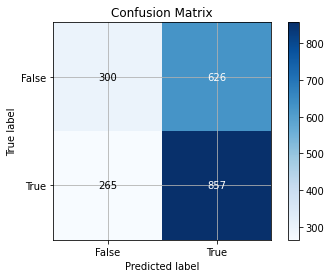

In [58]:
plot_confusionMatrix(logR_pipeline_ngram)

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


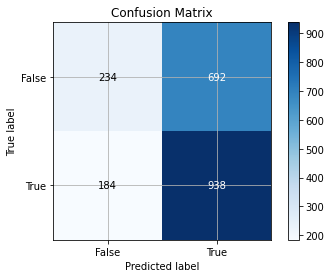

In [59]:
plot_confusionMatrix(nb_pipeline_ngram)

In [60]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [61]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [62]:
svm_pipeline = Pipeline([
        ('svmCV',countv),
        ('svm_clf',svm.LinearSVC())
        ])

In [63]:
train_news['subject'] = train_news['subject'].values.astype('U')
svm_pipeline.fit(train_news['subject'],train_news['Label'])
predicted_svm = svm_pipeline.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_svm == test_news['Label'])

0.5382203057624461

In [64]:
sgd_pipeline = Pipeline([
        ('svm2CV',countv),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

In [65]:
train_news['subject'] = train_news['subject'].values.astype('U')
sgd_pipeline.fit(train_news['subject'],train_news['Label'])
predicted_sgd = sgd_pipeline.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_sgd == test_news['Label'])

0.5480203841630733

In [66]:
random_forest = Pipeline([
        ('rfCV',countv),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])

In [67]:
train_news['subject'] = train_news['subject'].values.astype('U')
random_forest.fit(train_news['subject'],train_news['Label'])
predicted_rf = random_forest.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_rf == test_news['Label'])

0.5280282242257938

In [68]:
build_confusion_matrix(svm_pipeline)

Total statements classified: 10240
Score: 0.6744182980777914
score length 5
Confusion matrix:
[[1243 3245]
 [1174 4578]]


(None, None, None, None, None)

In [69]:
build_confusion_matrix(sgd_pipeline)

Total statements classified: 10240
Score: 0.6976580791633025
score length 5
Confusion matrix:
[[ 747 3741]
 [ 666 5086]]


(None, None, None, None, None)

In [70]:
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.6379328192647182
score length 5
Confusion matrix:
[[1771 2717]
 [1785 3967]]


(None, None, None, None, None)

In [71]:
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

In [72]:
train_news['subject'] = train_news['subject'].values.astype('U')
svm_pipeline_ngram.fit(train_news['subject'],train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_svm_ngram == test_news['Label'])

0.5221481771854175

In [73]:
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

In [74]:
train_news['subject'] = train_news['subject'].values.astype('U')
sgd_pipeline_ngram.fit(train_news['subject'],train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_sgd_ngram == test_news['Label'])

0.5456683653469228

In [75]:
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])

In [76]:
train_news['subject'] = train_news['subject'].values.astype('U')
random_forest_ngram.fit(train_news['subject'],train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['subject'].values.astype('U'))
np.mean(predicted_rf_ngram == test_news['Label'])

0.5295962367698942

In [77]:
build_confusion_matrix(svm_pipeline_ngram)

Total statements classified: 10240
Score: 0.6403281738134995
score length 5
Confusion matrix:
[[1744 2744]
 [1750 4002]]


(None, None, None, None, None)

In [78]:
build_confusion_matrix(sgd_pipeline_ngram)

Total statements classified: 10240
Score: 0.7073692710753823
score length 5
Confusion matrix:
[[ 576 3912]
 [ 463 5289]]


(None, None, None, None, None)

In [79]:
build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
Score: 0.6428493614654828
score length 5
Confusion matrix:
[[1642 2846]
 [1679 4073]]


(None, None, None, None, None)

In [80]:
print(classification_report(test_news['Label'], predicted_svm_ngram))

              precision    recall  f1-score   support

       False       0.49      0.72      0.58      1169
        True       0.60      0.36      0.45      1382

    accuracy                           0.52      2551
   macro avg       0.54      0.54      0.51      2551
weighted avg       0.55      0.52      0.51      2551



In [81]:
print(classification_report(test_news['Label'], predicted_sgd_ngram))

              precision    recall  f1-score   support

       False       0.55      0.04      0.08      1169
        True       0.55      0.97      0.70      1382

    accuracy                           0.55      2551
   macro avg       0.55      0.51      0.39      2551
weighted avg       0.55      0.55      0.42      2551



In [82]:
print(classification_report(test_news['Label'], predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.49      0.71      0.58      1169
        True       0.61      0.38      0.46      1382

    accuracy                           0.53      2551
   macro avg       0.55      0.54      0.52      2551
weighted avg       0.55      0.53      0.52      2551



/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


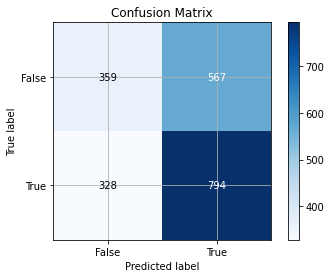

In [83]:
plot_confusionMatrix(svm_pipeline_ngram)

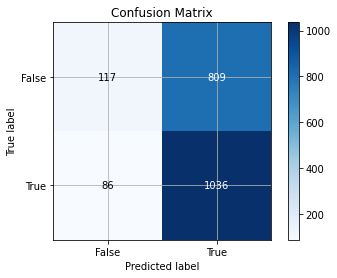

In [84]:
plot_confusionMatrix(sgd_pipeline_ngram)

/Users/jd/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


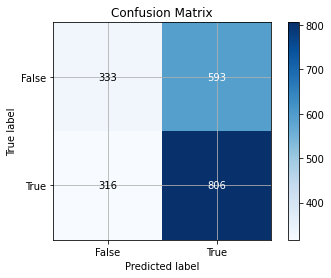

In [85]:
plot_confusionMatrix(random_forest_ngram)